<a href="https://colab.research.google.com/github/pranathadoddy/pima-database/blob/main/Copy_of_Diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import and load dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_pre = pd.read_csv("diabetes.csv")
df_pre

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Check for missing value

In [2]:
df_pre.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
df_pre.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Check for column with zero values

In [4]:
zero_count = df_pre[df_pre.columns[df_pre.eq(0).any()]].eq(0).sum()

print(zero_count)
print(df_pre.shape[0])

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64
768


## Fill zero value

In [5]:
#kolom Glucose, BloodPressure, SkinThickness, Insulin, BMI tidak logis jika ada nilai 0

df_copy = df_pre.copy()

# drop Glucose with value = 0
df_copy=df_copy[df_copy.Glucose != 0]

# fill zero value with median
df_copy["BloodPressure"]=df_copy["BloodPressure"].replace(0, df_copy["BloodPressure"].median())
df_copy["SkinThickness"]=df_copy["SkinThickness"].replace(0, df_copy["SkinThickness"].median())
df_copy["BMI"]=df_copy["BMI"].replace(0, df_copy["BMI"].median())

In [6]:
zero_count = df_copy[df_copy.columns[df_copy.eq(0).any()]].eq(0).sum()

print(zero_count)
print(df_copy.shape[0])

Pregnancies    111
Insulin        370
Outcome        497
dtype: int64
763


In [7]:
#value 0 pada "Insulin" sekitar 50 % total row dgn std yang tinggi, jadi lebih baik di drop

df_copy.drop(columns="Insulin")

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,23,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,23,30.1,0.349,47,1


## Feature Manipulation

<function matplotlib.pyplot.show(close=None, block=None)>

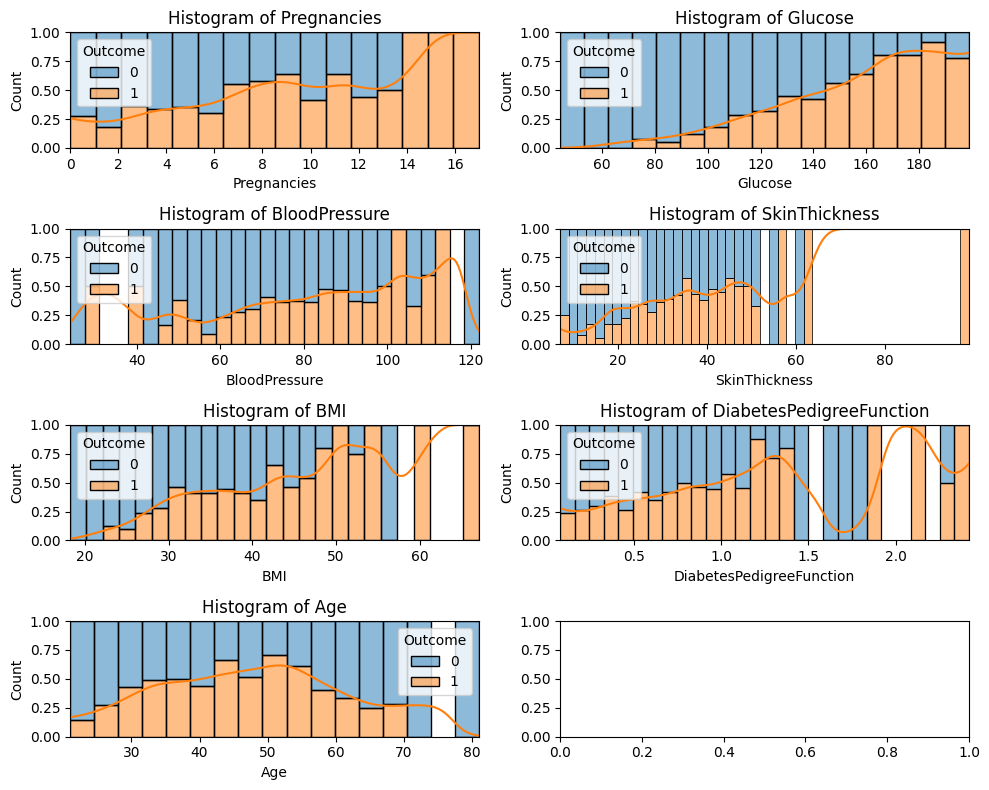

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the subplots and plot histplot
for i, column in enumerate(["Pregnancies","Glucose","BloodPressure","SkinThickness", "BMI","DiabetesPedigreeFunction", "Age"]):
    sns.histplot(data=df_copy, x=column, hue="Outcome",multiple='fill', kde=True, ax=axes[i])

    axes[i].set_title(f"Histogram of {column}")

plt.tight_layout()
plt.show

#sns.histplot(data=df_copy, x="Pregnancies", hue="Outcome",multiple='fill', kde=True,shrink=0.9)
#sns.histplot(data=df_copy, x="Glucose", hue="Outcome",multiple='fill', kde=True,shrink=0.9)
#sns.histplot(data=df_copy, x="BloodPressure", hue="Outcome",multiple='fill', kde=True,shrink=0.9)
#sns.histplot(data=df_copy, x="BMI", hue="Outcome",multiple='fill', kde=True,shrink=0.9)
#sns.histplot(data=df_copy, x="DiabetesPedigreeFunction", hue="Outcome",multiple='fill', kde=True,shrink=0.9)


## Check for class imbalance

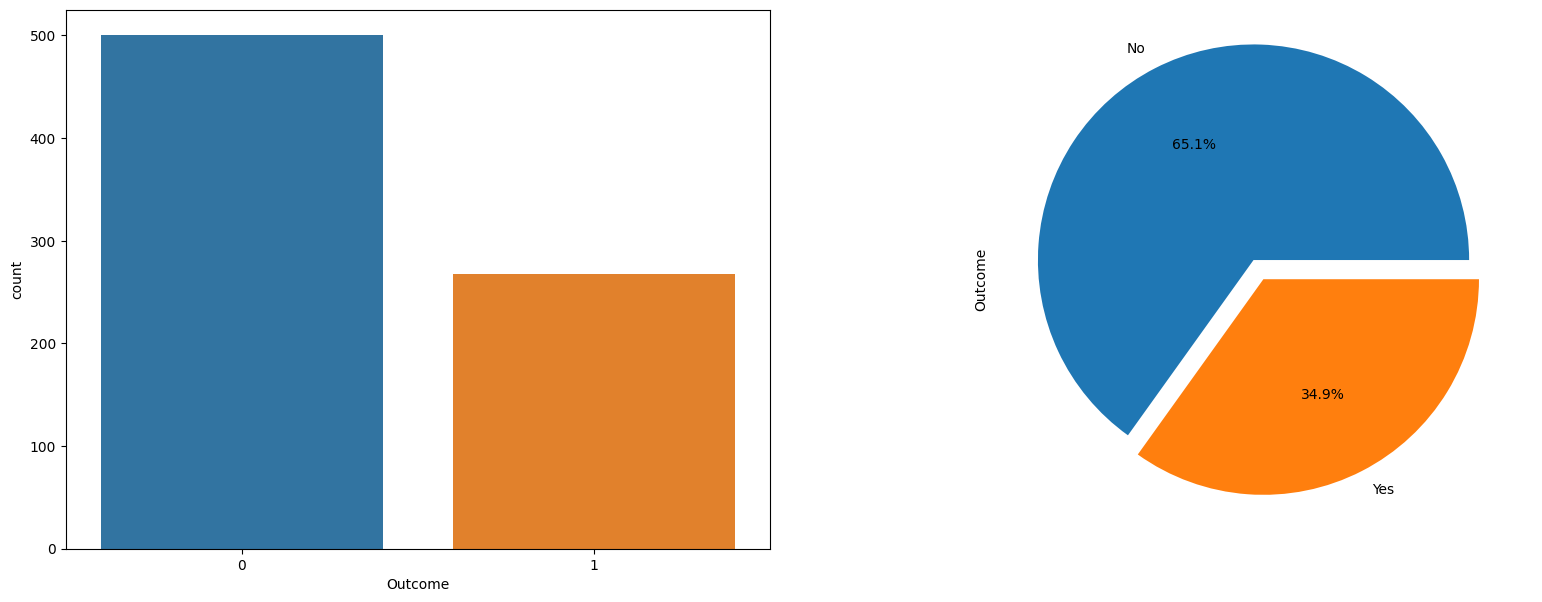

In [9]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

sns.countplot(x=df_pre["Outcome"], ax=ax[0])
df_pre["Outcome"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%",labels=["No", "Yes"], ax=ax[1])

plt.show()

# Dataset Splitting

In [10]:
X=df_copy.drop('Outcome',axis=1).values### independent features
y=df_copy['Outcome'].values###dependent features

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [14]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [15]:
X_train.shape

torch.Size([610, 8])

# Creating Model

In [16]:
df_copy.shape

(763, 9)

In [17]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,20)
        self.f_connected2=nn.Linear(20,20)
        self.out=nn.Linear(20,out_features)
        self.relu=nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        x=self.relu(self.f_connected1(x))
        x=self.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [18]:
model = ANN_Model()

In [19]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [20]:
sample_X = X_train
sample_y = y_train

BATCH_SIZE = 10
sample_X = torch.reshape(sample_X, (X_train.shape[0]//BATCH_SIZE, BATCH_SIZE, 8))
sample_y = torch.reshape(sample_y, (y_train.shape[0]//BATCH_SIZE, BATCH_SIZE))

sample_X.shape, sample_y.shape

(torch.Size([61, 10, 8]), torch.Size([61, 10]))

In [21]:
from pandas.core.frame import np_percentile_argname
epochs=500
final_losses=[]

for i in range(epochs):
    i=i+1
    print("Epoch", i)
    step_losses=[]
    for i, (inputs, target) in enumerate(zip(sample_X, sample_y)):
      y_pred=model.forward(inputs)
      loss=loss_function(y_pred,target)
      step_losses.append(loss)
      if i%10==1:
          print("Step :{} and the loss : {}".format(i,loss.item()))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    np_step_losses= [ loss.detach().numpy() for loss in step_losses]
    final_losses.append(np.average(np_step_losses))

Epoch 1
Step :1 and the loss : 2.34427547454834
Step :11 and the loss : 0.6635035276412964
Step :21 and the loss : 0.23492880165576935
Step :31 and the loss : 0.7426643371582031
Step :41 and the loss : 0.8171204328536987
Step :51 and the loss : 0.7379802465438843
Epoch 2
Step :1 and the loss : 0.6644983291625977
Step :11 and the loss : 0.5996635556221008
Step :21 and the loss : 0.3766619563102722
Step :31 and the loss : 0.5210407376289368
Step :41 and the loss : 0.6393711566925049
Step :51 and the loss : 0.6508841514587402
Epoch 3
Step :1 and the loss : 0.6579753756523132
Step :11 and the loss : 0.7432800531387329
Step :21 and the loss : 0.4223578870296478
Step :31 and the loss : 0.9960901141166687
Step :41 and the loss : 0.6241991519927979
Step :51 and the loss : 0.6477987170219421
Epoch 4
Step :1 and the loss : 0.6681323051452637
Step :11 and the loss : 0.745219886302948
Step :21 and the loss : 0.40851497650146484
Step :31 and the loss : 0.6644711494445801
Step :41 and the loss : 0.6

Text(0.5, 0, 'Epoch')

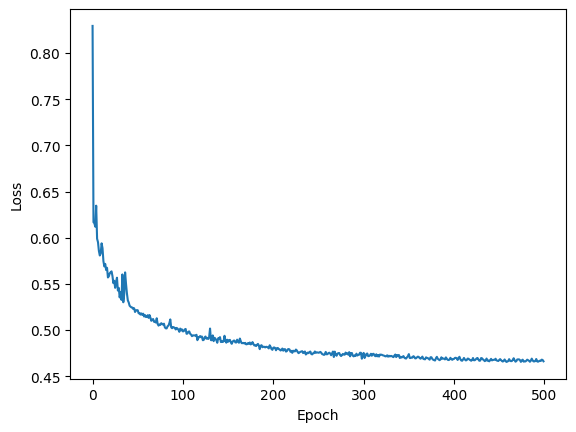

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [23]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[87, 15],
       [20, 31]])

Text(95.72222222222221, 0.5, 'Predicted Values')

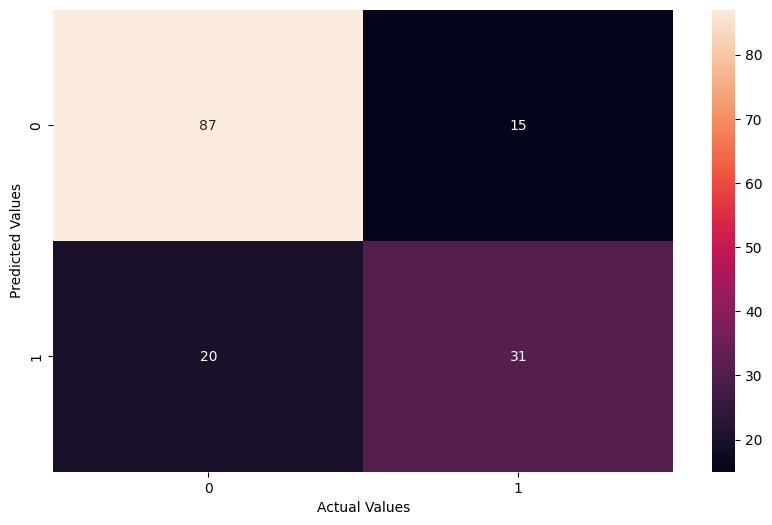

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [26]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7712418300653595